In [25]:
import numpy as np
import matplotlib.pyplot as plt

fdr='/home/zhaobenyan/dataset/resource/'
theme = '_'+'minimal-patch'

In [3]:
LGN_surfaceID_file = fdr + 'LGN_surfaceID' + theme + '.bin'

with open(LGN_surfaceID_file, 'rb') as f:
    # 读取网格大小
    w = np.fromfile(f, dtype='u4', count=2)[0]

    # 读取xyID数组
    xyID = np.fromfile(f, dtype='i4', count=512*2).reshape((2,512))
  
print(w)
print(xyID)

26
[[ 7  5  9 ...  4 14  1]
 [ 9 10  7 ...  3  3 14]]


In [4]:
LGN_vpos_file = fdr + 'LGN_vpos' + theme + '.bin'
fp = 'f4'
with open(LGN_vpos_file, 'rb') as f:
    nparvo, zero = np.fromfile(f, dtype='u4', count=2)
    ecc = np.fromfile(f, dtype=fp, count=1)[0]
    cart = np.fromfile(f, dtype=fp, count=4)
    parvo_cart = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))
    RG_OnOff = np.fromfile(f, dtype='u4', count=nparvo)
    parvo_polar = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))
print(nparvo)
print(ecc)
print(parvo_cart.shape)
print(RG_OnOff.shape)
print(parvo_polar.shape)

512
0.010245659
(2, 512)
(512,)
(2, 512)


In [15]:
pos_filename = fdr + 'V1_allpos'+theme+'.bin'
with open(pos_filename, 'rb') as f:
    # nblock=5和blockSize=1024
    nblock, blockSize = np.fromfile(f, dtype='u4', count=2)
    two=np.fromfile(f,dtype='u4',count=1)
    span=np.fromfile(f,dtype='f8',count=4)
    # fpos=(2,5120)维数组
    fpos = np.fromfile(f, dtype='f8', count=nblock*blockSize*2).reshape(2,nblock*blockSize)
    vspan=np.fromfile(f,dtype='f8',count=4)
    # vpos=(2,5120)维数组
    vpos = np.fromfile(f, dtype='f8',count=nblock*blockSize*2).reshape(2,nblock*blockSize)
print(nblock, blockSize )
print(span)
print(fpos[0][0:5])
print(vspan)
print(vpos[0,:].min(), vpos[0,:].max())
print(vpos[1,:].min(), vpos[1,:].max())
print(vpos[0][0:5])
print(pos_filename)
print(two)

5 1024
[-0.25  0.5  -0.25  0.5 ]
[ 0.09853211  0.09285008 -0.10565625  0.08201728 -0.00138375]
[-0.01024566  0.02049132 -0.01024566  0.02049132]
-0.010116123004897103 0.010116939228082157
-0.010116703337760722 0.010116524200755503
[ 4.03810554e-03  3.80524088e-03 -4.33007180e-03  3.36128446e-03
 -5.67097241e-05]
/home/zhaobenyan/dataset/resource/V1_allpos_minimal-patch.bin
[2]


In [18]:
vpos_filename = fdr + 'V1_vpos'+theme+'.bin'
with open(vpos_filename, 'rb') as f:
  n = np.fromfile(f,dtype='u4',count=1)[0]
  V1_vpos=np.fromfile(f,dtype='f8',count=n*2).reshape(2,n)
print(n)
print(V1_vpos)

5120
[[ 0.00445472  0.00420016  0.00445472 ...  0.00574047  0.00728511
   0.0098595 ]
 [-0.43592958  0.43712103 -2.90447376 ... -1.0182357  -0.67558525
  -0.68476921]]


In [23]:
feature_filename = fdr+'V1_feature'+theme+'.bin'
with open(feature_filename, 'rb') as f:
    nFeature=np.fromfile(f,dtype='u4',count=1)[0]
    LR=np.fromfile(f,dtype='f4',count=5120)
    OP=np.fromfile(f,dtype='f4',count=5120)
print(nFeature)
print(LR.shape)
print(OP)


2
(5120,)
[0.93061966 0.06956998 0.5377386  ... 0.8379428  0.8924773  0.8910156 ]


(2, 512)


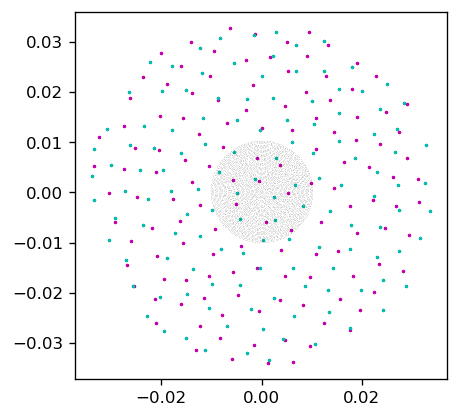

In [26]:
fig = plt.figure(figsize = (4,4), dpi = 120)
ax = fig.add_subplot(111)
parvo_mc = ['or', 'om', 'og', 'oc']
for i in range(4):
    pick = RG_OnOff == i
    ax.plot(parvo_cart[0,pick], parvo_cart[1,pick], parvo_mc[i], ms = 1)
ax.plot(vpos[0,:], vpos[1,:], ',k', alpha = 0.1)
ax.set_aspect('equal')
print(parvo_cart.shape)

In [28]:
print(xyID)

[[ 7  5  9 ...  4 14  1]
 [ 9 10  7 ...  3  3 14]]
[[-2.5687826  -2.8249316  -2.1274676  ... -2.3172112  -1.5583992
   3.0470252 ]
 [ 0.01871046  0.02290322  0.01971566 ...  0.03352072  0.02714696
   0.03398945]]
